# ECONOMIC INDEX PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256

In [4]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace = True)

In [5]:
df_index.head()

interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256

In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
sns.pairplot(df_index)

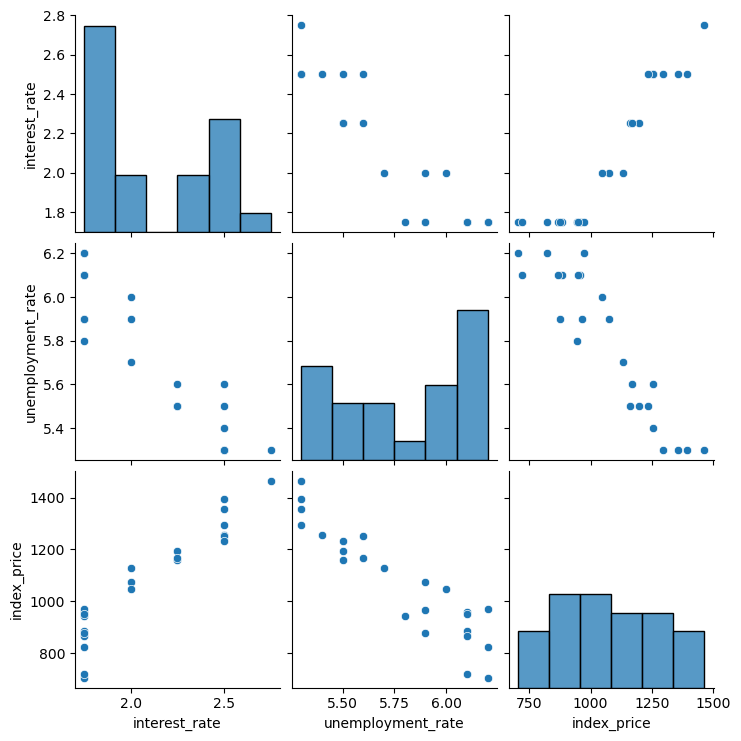

In [8]:
plt.show()

In [9]:
df_index.corr()

interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.925814     0.935793
unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000

In [10]:
sns.scatterplot(x='interest_rate' , y='unemployment_rate', data= df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

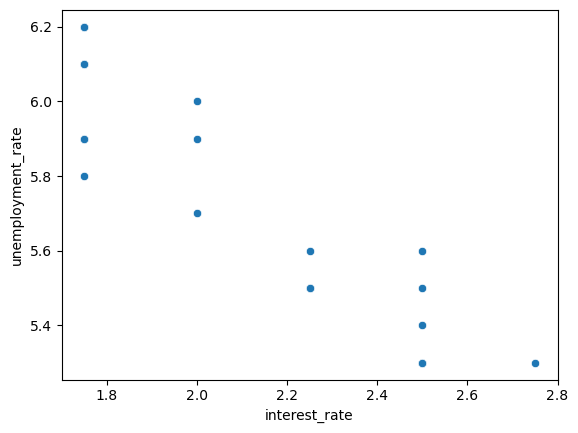

In [11]:
plt.show()

In [12]:
# Independent and dependent features 

In [13]:
X=df_index[['interest_rate','unemployment_rate']]

In [14]:
X.head()

interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4

In [15]:
#or
X=df_index.iloc[:,:-1]

In [16]:
X.head()

interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4

In [17]:
y =df_index.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [18]:
#TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42) 

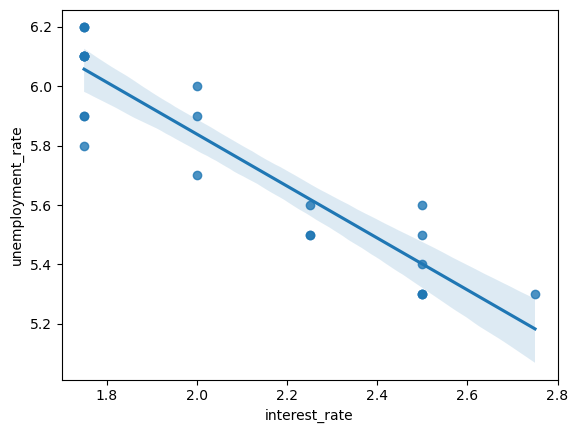

In [20]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

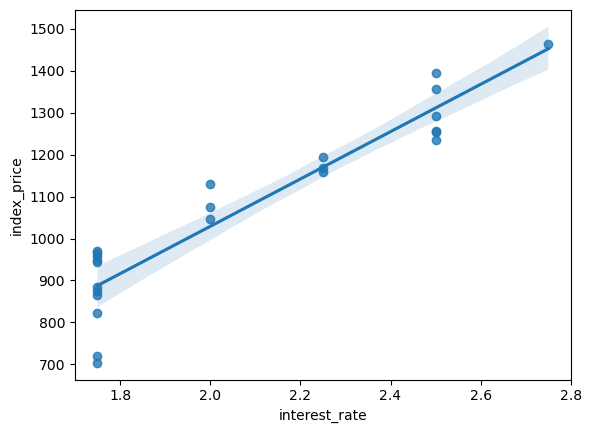

In [21]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test =scaler.transform(X_test)

In [26]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression(n_jobs = -1)

In [29]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                        cv=3)

In [31]:
np.mean(validation_score)

-5914.828180162396

In [32]:
#prediction
y_pred = regression.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [34]:
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323556
76.11677139574813


In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 -  score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[-1] - 1)
print(score)
print(adj_r2)

0.8278978091457142
0.713163015242857


# ASSUMPTIONS

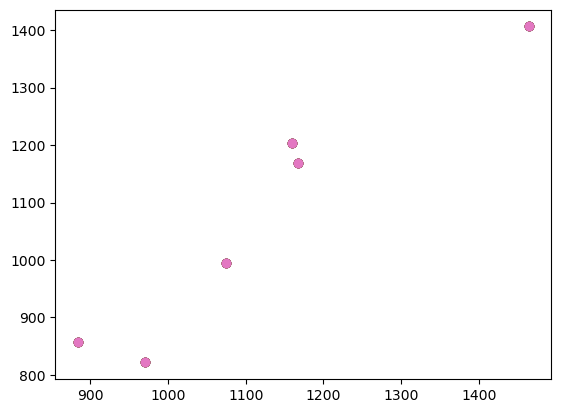

In [43]:
plt.scatter(y_test,y_pred)
plt.show()

IF LINEAR RELATIONSHIP BETWEEN YTEST AND YPRED THEN MODEL HAS PERFORMED WELL

In [44]:
residual = y_test-y_pred
residual

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

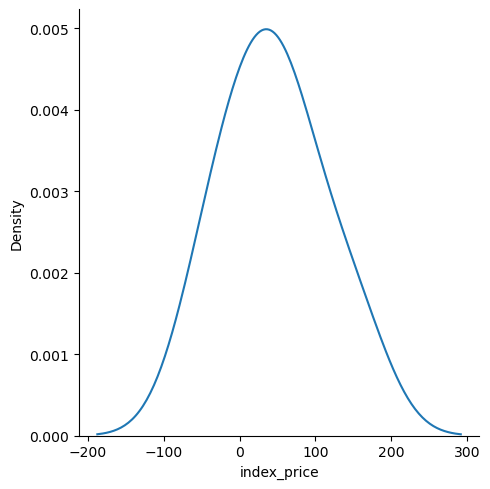

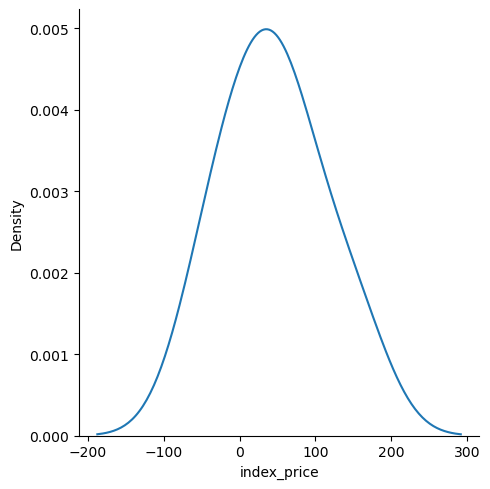

In [46]:
sns.displot(residual, kind ='kde')
plt.show()

normal function therefore good model

## scatter plot wrt predictions and residuals

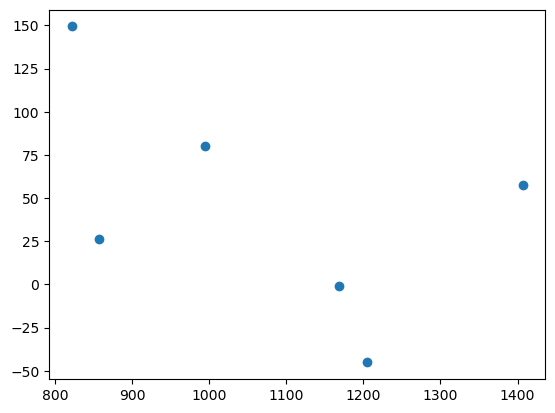

In [49]:
plt.scatter(y_pred,residual)
plt.show()